# Introduction

# Genetic Programming (GP)

Genetic Programming (GP) is a computational approach inspired by natural evolution that is used to evolve computer programs to solve complex problems.

## Key Concepts

1. **Population**:
   - In GP, we start with a population of individuals. Each individual represents a candidate solution to the problem we're trying to solve. 
   - In this project, each individual will be an expression tree representing a mathematical function.

2. **Fitness Function**:
   - The fitness function evaluates how well each individual performs the task. 
   - In our case, it measures how close the output of the function represented by an individual's expression tree is to the desired output (which we obtain from the black box function).

3. **Selection**:
   - Individuals are selected from the population based on their fitness scores to undergo genetic operations like crossover and mutation. 
   - Individuals with higher fitness scores are more likely to be selected, mimicking the principle of "survival of the fittest".

4. **Crossover**:
   - Crossover is a genetic operation where two selected individuals (parents) exchange genetic information to produce offspring. 
   - In the context of expression trees, crossover involves swapping subtrees between two parent trees to create new offspring trees.

5. **Mutation**:
   - Mutation introduces random changes in individual trees to explore new areas of the search space. 
   - It helps maintain diversity in the population and prevent premature convergence to suboptimal solutions.

6. **Evolutionary Loop**:
   - The main loop of the genetic algorithm involves repeatedly applying selection, crossover, and mutation to evolve the population over multiple generations. 
   - This process continues until a termination condition is met.


# Representation for Expression Trees


## TreeNode Class

The `TreeNode` class represents a node in the expression tree. Each node has a value, a left child, and a right child.

### Constructor

- **Parameters**: `value` (any): The value of the node.
- **Attributes**:
  - `value`: The value stored in the node.
  - `left`: The left child of the node.
  - `right`: The right child of the node.

### evaluate Method

The `evaluate` method computes the result of the expression represented by the subtree rooted at the current node, given a value `x`.

- **Parameters**: `x` (int, float, or numpy array): The input value(s) for evaluating the expression.
- **Returns**: The result of the expression evaluation.

### get_all_nodes Method

The `get_all_nodes` method returns a list containing all nodes in the subtree rooted at the current node.

## ExpressionTree Class

The `ExpressionTree` class represents an expression tree, which is constructed from a given mathematical expression.

### Constructor

- **Parameters**: `expression` (str): The mathematical expression.
- **Attributes**:
  - `root`: The root node of the expression tree.

### construct_tree Method

The `construct_tree` method constructs the expression tree from the given mathematical expression.

- **Parameters**: `expression` (str): The mathematical expression.
- **Returns**: The root node of the constructed expression tree.

### display Method

The `display` method visualizes the expression tree using matplotlib.

### plot_tree Method

The `plot_tree` method recursively plots the expression tree nodes using matplotlib.

### to_expression_string Method

The `to_expression_string` method returns a string representation of the expression tree.

- **Returns**: The string representation of the expression tree.




## Implementation

In [1]:
import matplotlib.pyplot as plt
import random
import math
import copy
import numpy as np


In [2]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def evaluate(self, x):
        if isinstance(x, (int, float)):
            # Handle one-dimensional input
            if self.value == 'x':
                return x
            elif self.value == 'y':
                return np.random.random()  # Assuming y is a random variable for now
            elif self.value == 'sin':
                return np.sin(self.left.evaluate(x))
            elif self.value == 'cos':
                return np.cos(self.left.evaluate(x))
            elif self.value == '+':
                return self.left.evaluate(x) + self.right.evaluate(x)
            elif self.value == '-':
                return self.left.evaluate(x) - self.right.evaluate(x)
            elif self.value == '*':
                return self.left.evaluate(x) * self.right.evaluate(x)
            elif self.value == '/':
                right_val = self.right.evaluate(x)
                return self.left.evaluate(x) / right_val if right_val != 0 else 1  # Avoid division by zero
            elif self.value == '^':
                return self.left.evaluate(x) ** self.right.evaluate(x)
            else:
                return float(self.value)
        elif isinstance(x, np.ndarray):
            # Handle multi-dimensional input
            if self.value == 'x':
                return x[0]  # Assuming x is a vector [x1, x2, ...]
            elif self.value == 'y':
                return np.random.random()  # Assuming y is a random variable for now
            elif self.value == 'sin':
                return np.sin(self.left.evaluate(x))
            elif self.value == 'cos':
                return np.cos(self.left.evaluate(x))
            elif self.value == '+':
                return self.left.evaluate(x) + self.right.evaluate(x)
            elif self.value == '-':
                return self.left.evaluate(x) - self.right.evaluate(x)
            elif self.value == '*':
                return self.left.evaluate(x) * self.right.evaluate(x)
            elif self.value == '/':
                right_val = self.right.evaluate(x)
                return self.left.evaluate(x) / right_val if right_val != 0 else 1  # Avoid division by zero
            elif self.value == '^':
                return self.left.evaluate(x) ** self.right.evaluate(x)
            else:
                return float(self.value)
        else:
            raise ValueError("Input must be a scalar or a numpy array.")

    def get_all_nodes(self):
        nodes = [self]
        if self.left:
            nodes.extend(self.left.get_all_nodes())
        if self.right:
            nodes.extend(self.right.get_all_nodes())
        return nodes


class ExpressionTree:
    def __init__(self, expression):
        self.root = self.construct_tree(expression)

    def construct_tree(self, expression):
        expression = expression.replace(" ", "")
        return self._construct_tree_helper(expression)

    def _construct_tree_helper(self, expression):
        if expression.startswith("(") and expression.endswith(")"):
            expression = expression[1:-1]

        # Find the operator with the lowest precedence
        lowest_precedence = None
        lowest_index = -1
        level = 0
        for i in range(len(expression)):
            if expression[i] == "(":
                level += 1
            elif expression[i] == ")":
                level -= 1
            elif level == 0 and expression[i] in "+-*/^":
                if lowest_precedence is None or "+-*/^".index(expression[i]) < "+-*/^".index(lowest_precedence):
                    lowest_precedence = expression[i]
                    lowest_index = i
        # If no operator found, it must be a single operand
        if lowest_precedence is None:
            if expression.startswith("sin"):
                # Handle single operand functions
                op = TreeNode("sin")
                op.left = self._construct_tree_helper(expression[4:-1])  
                return op
            elif expression.startswith("cos"):
                # Handle single operand functions
                op = TreeNode("cos")
                op.left = self._construct_tree_helper(expression[4:-1]) 
                return op
            else:
                return TreeNode(expression)
        # Create the root node
        root = TreeNode(expression[lowest_index])
        # Construct left and right subtrees recursively
        root.left = self._construct_tree_helper(expression[:lowest_index])
        root.right = self._construct_tree_helper(expression[lowest_index + 1:])
        return root

    def display(self):
        plt.figure(figsize=(8, 6))
        self.plot_tree(self.root)
        plt.axis('off')  # Hide axis
        plt.show()

    def plot_tree(self, node, pos=(0, 0), level=1, width=800, height=400):
        if node is not None:
            x, y = pos
            plt.text(x, y, str(node.value), style='italic', bbox={'facecolor': 'white', 'pad': 10})
            next_level = height / (level + 1)
            if node.left is not None:
                left_pos = (x - width / (2 * (level + 1)), y - next_level)
                plt.plot([x, left_pos[0]], [y, left_pos[1]], 'k-', lw=2)
                self.plot_tree(node.left, left_pos, level + 1, width, height)
            if node.right is not None:
                right_pos = (x + width / (2 * (level + 1)), y - next_level)
                plt.plot([x, right_pos[0]], [y, right_pos[1]], 'k-', lw=2)
                self.plot_tree(node.right, right_pos, level + 1, width, height)

    def to_expression_string(self):
        return self._to_expression_string_helper(self.root)

    def _to_expression_string_helper(self, node):
        if node is None:
            return ""
        if node.left is None and node.right is None:
            return str(node.value)
        if node.value in ["sin", "cos"]:
            return f"{node.value}({self._to_expression_string_helper(node.left)})"
        else:
            left_exp = self._to_expression_string_helper(node.left)
            right_exp = self._to_expression_string_helper(node.right)
            return f"({left_exp} {node.value} {right_exp})"


# GeneticAlgorithm Class

The `GeneticAlgorithm` class implements a genetic algorithm for symbolic regression, which evolves expression trees to fit a given training set of data points.

## Constructor

- **Parameters**:
  - `population_size` (int): The size of the population.
  - `max_depth` (int): The maximum depth of the expression trees.
  - `training_set` (list of tuples): The training set containing (x, y) pairs.
  - `crossover_rate` (float, optional): The probability of crossover during reproduction. Default is 0.8.
  - `mutation_rate` (float, optional): The probability of mutation during reproduction. Default is 0.2.

## Methods

### generate_random_expression Method

Generates a random expression tree with a specified depth.

### generate_initial_population Method

Generates the initial population of expression trees.

### evaluate_fitness Method

Evaluates the fitness of an individual expression tree by calculating the mean absolute error between the predicted values and the true values from the training set.

### selection Method

Performs tournament selection to choose individuals for reproduction based on their fitness.

### crossover Method

Performs subtree crossover between two parent expression trees with a certain probability.

### mutation Method

Performs subtree mutation on an individual expression tree with a certain probability.

### evolutionary_loop Method

Executes one generation of the genetic algorithm, including selection, crossover, and mutation.

### termination_condition Method

Checks if the termination condition for the evolutionary loop has been met. In this case, the termination condition is based on the number of generations.



In [3]:
class GeneticAlgorithm:
    def __init__(self, population_size, max_depth, training_set, crossover_rate=0.8, mutation_rate=0.2):
        self.population_size = population_size
        self.max_depth = max_depth
        self.training_set = training_set
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def generate_random_expression(self, depth):
        if depth == 0 or (random.random() < 0.3 and depth < self.max_depth):
            # Generate a random operand
            operands = ['x', 'y', 'sin(x)', 'cos(x)']
            return random.choice(operands)
        else:
            # Generate a random operator
            operators = ['+', '-', '*', '/', '^']
            operator = random.choice(operators)
            return '(' + operator.join([self.generate_random_expression(depth - 1) for _ in range(2)]) + ')'

    def generate_initial_population(self):
        population = []
        for _ in range(self.population_size):
            depth = random.randint(1, self.max_depth)
            expression = self.generate_random_expression(depth)
            population.append(ExpressionTree(expression))
        return population

    def evaluate_fitness(self, individual):
        total_error = 0.0
        for point in self.training_set:
            x, y_true = point
            y_pred = individual.root.evaluate(x)
            total_error += np.mean(np.abs(y_true - y_pred))
        return total_error

    def selection(self, population):
        # Perform tournament selection
        tournament_size = min(3, len(population))
        selected = []
        for _ in range(len(population)):
            participants = random.sample(population, tournament_size)
            winner = min(participants, key=lambda x: self.evaluate_fitness(x))
            selected.append(winner)
        return selected

    def crossover(self, parent1, parent2):
        if random.random() < self.crossover_rate:
            # Perform subtree crossover
            crossover_point1 = random.choice(parent1.root.get_all_nodes())
            crossover_point2 = random.choice(parent2.root.get_all_nodes())
            # Ensure crossover points are not None and have left and right children
            if crossover_point1 and crossover_point2 and crossover_point1.left and crossover_point1.right and crossover_point2.left and crossover_point2.right:
                crossover_point1.value, crossover_point2.value = crossover_point2.value, crossover_point1.value
            else:
                pass

    def mutation(self, individual):
        if random.random() < self.mutation_rate:
            # Perform subtree mutation
            mutation_point = random.choice(individual.root.get_all_nodes())
            # Ensure mutation point is not None and has left and right children
            if mutation_point and mutation_point.left and mutation_point.right:
                if mutation_point.value in ['+', '-', '*', '/', '^', 'sin', 'cos']:
                    mutation_point.value = random.choice(['+', '-', '*', '/', '^', 'sin', 'cos', 'x', 'y'])
                else:
                    mutation_point.value = str(random.uniform(-10, 10))
            else:
                pass

    def evolutionary_loop(self, population):
        # Selection
        selected = self.selection(population)
        # Ensure even number of selected individuals
        if len(selected) % 2 != 0:
            selected.pop()  # Discard the last individual
        # Crossover
        offspring = []
        for i in range(0, len(selected), 2):
            parent1, parent2 = selected[i], selected[i+1]
            child1 = copy.deepcopy(parent1)
            child2 = copy.deepcopy(parent2)
            self.crossover(child1, child2)
            offspring.extend([child1, child2])
        # Mutation
        for individual in offspring:
            self.mutation(individual)
        return offspring

    def termination_condition(self, generations):
        return generations >= 15


## Example Usage

shoing first 5 initial population (and mse)

Individual 1:
Expression: (cos(x) ^ (y + x))

Individual 1 Fitness: nan


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_8404\809343015.py:51: RuntimeWarning: invalid value encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)


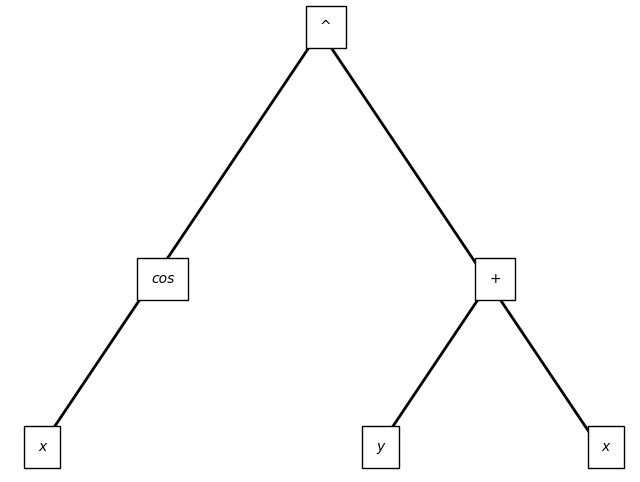

Individual 2:
Expression: (x - y)

Individual 2 Fitness: 25.517939975758647


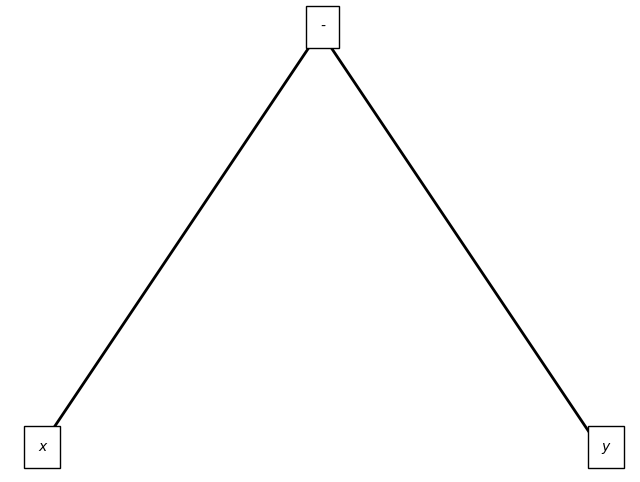

Individual 3:
Expression: ((x * cos(x)) + cos(x))

Individual 3 Fitness: 33.12780588430692


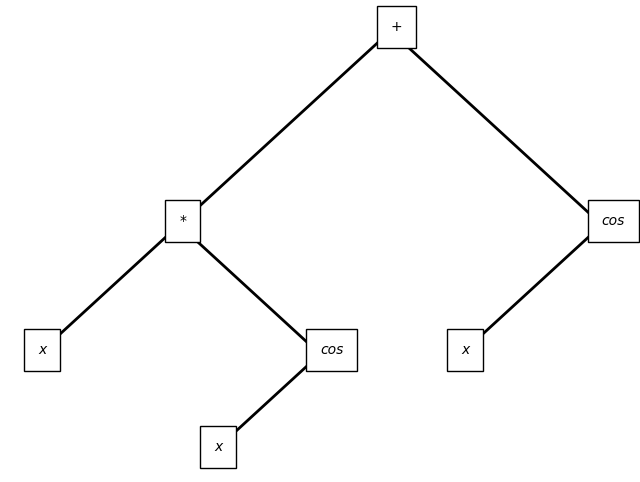

Individual 4:
Expression: ((x - (cos(x) ^ y)) + sin(x))

Individual 4 Fitness: nan


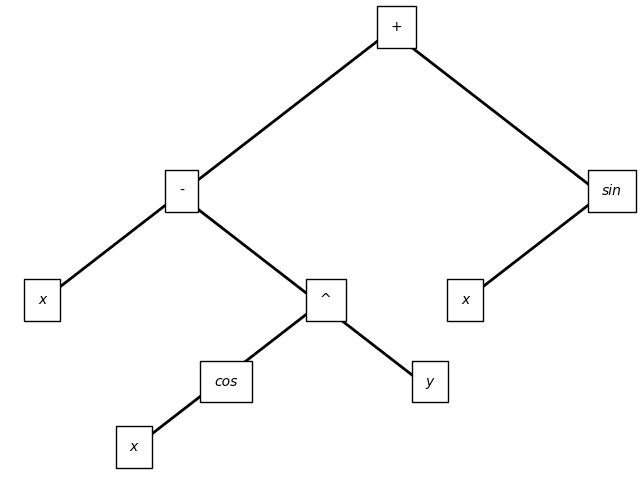

Individual 5:
Expression: (y ^ sin(x))

Individual 5 Fitness: 26.909157570051477


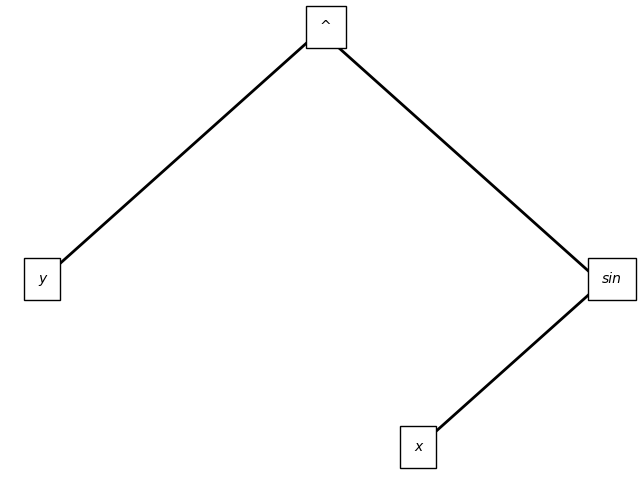

Generation 1, Best Fitness: 24.251435966305465
Generation 2, Best Fitness: 24.50354831115005
Generation 3, Best Fitness: 24.127569232256462
Generation 4, Best Fitness: 24.41749657205815
Generation 5, Best Fitness: 24.427020891545116
Generation 6, Best Fitness: 24.284319618856134
Generation 7, Best Fitness: 25.111730869265934
Generation 8, Best Fitness: 25.195426164205767
Generation 9, Best Fitness: 24.495231400993134
Generation 10, Best Fitness: 24.567538969949602
Generation 11, Best Fitness: 23.99948792235144
Generation 12, Best Fitness: 24.36116742320931
Generation 13, Best Fitness: 24.872128580751877
Generation 14, Best Fitness: 24.604586498519094
Generation 15, Best Fitness: 25.09471828908566


In [4]:


training_set = [(np.array([1, 2]), 5), (np.array([2, 3]), 9), (np.array([3, 4]), 15)]
genetic_algorithm = GeneticAlgorithm(population_size=5, max_depth=3, training_set=training_set)
population = genetic_algorithm.generate_initial_population()

for i, tree in enumerate(population):
    print(f"Individual {i+1}:\nExpression: {tree.to_expression_string()}\n")
    fitness = genetic_algorithm.evaluate_fitness(tree)
    print(f"Individual {i+1} Fitness: {fitness}")
    tree.display()

# Evolutionary loop
generations = 0
while not genetic_algorithm.termination_condition(generations):
    population = genetic_algorithm.evolutionary_loop(population)
    best_individual = min(population, key=lambda x: genetic_algorithm.evaluate_fitness(x))
    print(f"Generation {generations+1}, Best Fitness: {genetic_algorithm.evaluate_fitness(best_individual)}")
    generations += 1

# Training the Genetic Algorithm for One-Dimensional Functions

This part of the project demonstrates how to train the genetic algorithm to approximate a one-dimensional function.
## steps

### Step 1: Generate Training Data

Training data is generated from a known one-dimensional function. In this example, the true function is defined as `np.cos(2 * x)`.

### Step 2: Train the Genetic Algorithm

The genetic algorithm is initialized with parameters such as population size, maximum depth of expression trees, and the training set. Then, the initial population of expression trees is generated.

### Evolutionary Loop

The evolutionary loop iteratively evolves the population of expression trees through selection, crossover, and mutation until a termination condition is met.

### Step 3: Validation

A validation set is generated to evaluate the performance of the best individual expression tree found during the evolutionary process. The true function values are compared with the predicted function values.

### Step 4: Measure Mean Squared Error (MSE)

The mean squared error (MSE) between the true function values and the predicted function values is calculated to quantify the accuracy of the predictions.

### Step 5: Visualization

The true function and the predicted function are plotted to visualize how well the genetic algorithm approximates the true function. Additionally, the expression tree representing the predicted function is displayed for further analysis.



## Examples

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_8404\809343015.py:28: RuntimeWarning: invalid value encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_8404\809343015.py:28: RuntimeWarning: overflow encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)


Generation 1, Best Fitness: 191.5637796575778
Generation 2, Best Fitness: 179.36916494524604
Generation 3, Best Fitness: 185.10623958946996
Generation 4, Best Fitness: 185.05483488118549
Generation 5, Best Fitness: 186.30164190189683
Generation 6, Best Fitness: 181.85897721069475
Generation 7, Best Fitness: 158.48443013789932
Generation 8, Best Fitness: 157.77174767528498
Generation 9, Best Fitness: 118.62193630008608
Generation 10, Best Fitness: 117.86054949266244
Generation 11, Best Fitness: 117.77265845315824
Generation 12, Best Fitness: 118.8137493896373
Generation 13, Best Fitness: 118.85495388473625
Generation 14, Best Fitness: 117.03953056786557
Generation 15, Best Fitness: 117.81458501809749
Validation MSE: 0.09559084428994666


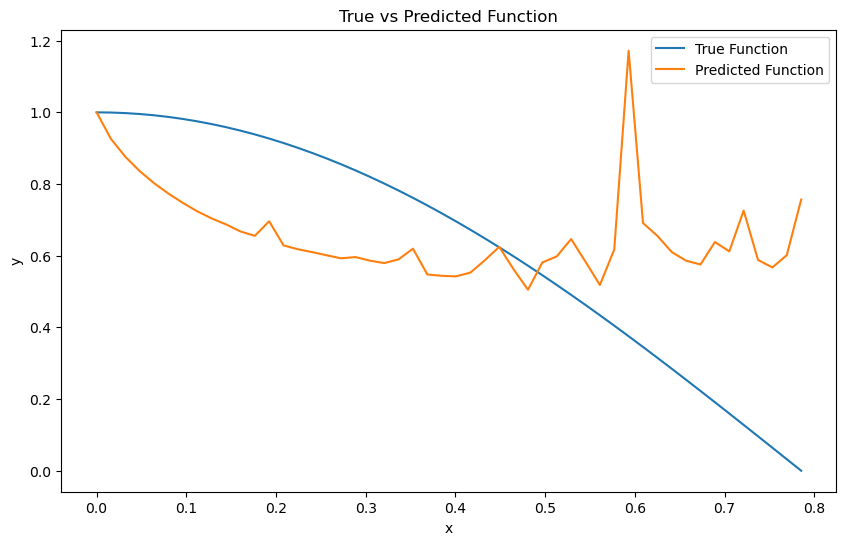

Predicted Function ExpressionTree


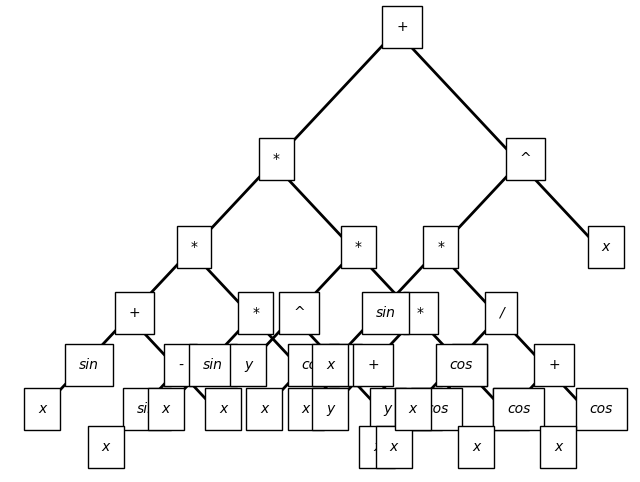

In [5]:


# Step 1: Generate training data from a known function
def true_function(x):
    return np.cos(2 * x)

training_set_size = 500
x_train = np.linspace(0, np.pi/4, training_set_size)
y_train = true_function(x_train)

training_set = list(zip(x_train, y_train))

# Step 2: Train the genetic algorithm
genetic_algorithm = GeneticAlgorithm(population_size=10, max_depth=5, training_set=training_set)
population = genetic_algorithm.generate_initial_population()

# Evolutionary loop
generations = 0
while not genetic_algorithm.termination_condition(generations):
    population = genetic_algorithm.evolutionary_loop(population)
    print(f"Generation {generations+1}, Best Fitness: {genetic_algorithm.evaluate_fitness(min(population, key=genetic_algorithm.evaluate_fitness))}")
    generations += 1

# Step 3: Validation
validation_set_size = 50
x_val = np.linspace(0, np.pi/4, validation_set_size)
y_val_true = true_function(x_val)

# Predict using the best individual from the last generation
best_individual = min(population, key=genetic_algorithm.evaluate_fitness)
y_val_pred = [best_individual.root.evaluate(x) for x in x_val]

# Step 4: Measure MSE
mse = np.mean((y_val_true - y_val_pred) ** 2)
print(f"Validation MSE: {mse}")

# Step 5: Visualization
plt.figure(figsize=(10, 6))
plt.plot(x_val, y_val_true, label='True Function')
plt.plot(x_val, y_val_pred, label='Predicted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Function')
plt.legend()
plt.show()
print('Predicted Function ExpressionTree')
best_individual.display()



C:\Users\Mahdi\AppData\Local\Temp\ipykernel_8404\809343015.py:28: RuntimeWarning: invalid value encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)


Generation 1, Best Fitness: 20.453115077072606
Generation 2, Best Fitness: 20.453115077072606
Generation 3, Best Fitness: 20.453115077072606
Generation 4, Best Fitness: 20.453115077072606
Generation 5, Best Fitness: 6.913750544972775
Generation 6, Best Fitness: 6.913750544972775
Generation 7, Best Fitness: 6.913750544972775
Generation 8, Best Fitness: 6.913750544972775
Generation 9, Best Fitness: 1.862429474188704
Generation 10, Best Fitness: 1.862429474188704
Generation 11, Best Fitness: 1.862429474188704
Generation 12, Best Fitness: 1.862429474188704
Generation 13, Best Fitness: 1.627471707305129
Generation 14, Best Fitness: 1.627471707305129
Generation 15, Best Fitness: 1.627471707305129
Validation MSE: 0.007794370160724832


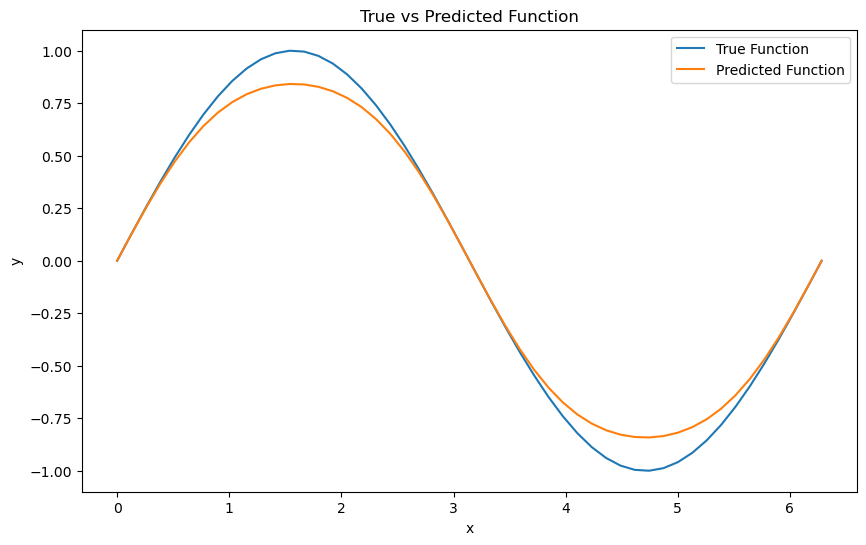

Predicted Function ExpressionTree


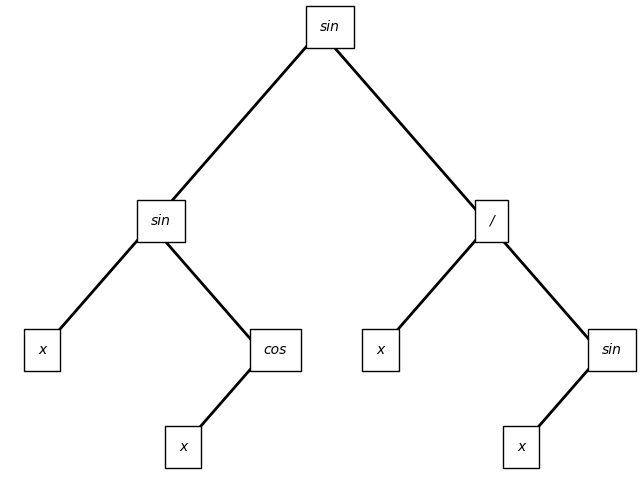

In [6]:


# Step 1: Generate training data from a known function
def true_function(x):
    return np.sin(x)

training_set_size = 100
x_train = np.linspace(0, np.pi/4, training_set_size)
y_train = true_function(x_train)

training_set = list(zip(x_train, y_train))

# Step 2: Train the genetic algorithm
genetic_algorithm = GeneticAlgorithm(population_size=20, max_depth=5, training_set=training_set)
population = genetic_algorithm.generate_initial_population()

# Evolutionary loop
generations = 0
while not genetic_algorithm.termination_condition(generations):
    population = genetic_algorithm.evolutionary_loop(population)
    print(f"Generation {generations+1}, Best Fitness: {genetic_algorithm.evaluate_fitness(min(population, key=genetic_algorithm.evaluate_fitness))}")
    generations += 1

# Step 3: Validation
validation_set_size = 50
x_val = np.linspace(0, 2*np.pi, validation_set_size)
y_val_true = true_function(x_val)

# Predict using the best individual from the last generation
best_individual = min(population, key=genetic_algorithm.evaluate_fitness)
y_val_pred = [best_individual.root.evaluate(x) for x in x_val]

# Step 4: Measure MSE
mse = np.mean((y_val_true - y_val_pred) ** 2)
print(f"Validation MSE: {mse}")

# Step 5: Visualization
plt.figure(figsize=(10, 6))
plt.plot(x_val, y_val_true, label='True Function')
plt.plot(x_val, y_val_pred, label='Predicted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Function')
plt.legend()
plt.show()
print('Predicted Function ExpressionTree')
best_individual.display()



# Training the Genetic Algorithm for Two-Dimensional Functions

This section outlines the process of training the genetic algorithm to approximate a two-dimensional function.
## Steps

### Step 1: Generate Training Data

Training data is generated from a known two-dimensional function. In this example, the true function is defined as `f(x, y) = x^2 + y^2`.

### Step 2: Train the Genetic Algorithm

The genetic algorithm is initialized with parameters such as population size, maximum depth of expression trees, and the training set. Then, the initial population of expression trees is generated.

### Evolutionary Loop

The evolutionary loop iteratively evolves the population of expression trees through selection, crossover, and mutation until a termination condition is met.

### Step 3: Validation

A validation set is generated to evaluate the performance of the best individual expression tree found during the evolutionary process. The true function values are compared with the predicted function values.

### Step 4: Measure Mean Squared Error (MSE)

The mean squared error (MSE) between the true function values and the predicted function values is calculated to quantify the accuracy of the predictions.

### Step 5: Visualization

Since it's a two-dimensional function, visualization is done in a scatter plot. The true function values and the predicted function values are plotted against the input variables (x, y). Additionally, the expression tree representing the predicted function is displayed for further analysis.



## Examples

Generation 1, Best Fitness: nan


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_8404\809343015.py:51: RuntimeWarning: invalid value encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_8404\809343015.py:51: RuntimeWarning: overflow encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)


Generation 2, Best Fitness: nan
Generation 3, Best Fitness: 205.01095853799686
Generation 4, Best Fitness: nan
Generation 5, Best Fitness: nan
Generation 6, Best Fitness: 244.66674648287537
Generation 7, Best Fitness: 198.68134928566064
Generation 8, Best Fitness: nan
Generation 9, Best Fitness: nan
Generation 10, Best Fitness: nan
Generation 11, Best Fitness: 204.16405030048634
Generation 12, Best Fitness: nan
Generation 13, Best Fitness: nan
Generation 14, Best Fitness: 198.58665290239315
Generation 15, Best Fitness: nan
Validation MSE: nan


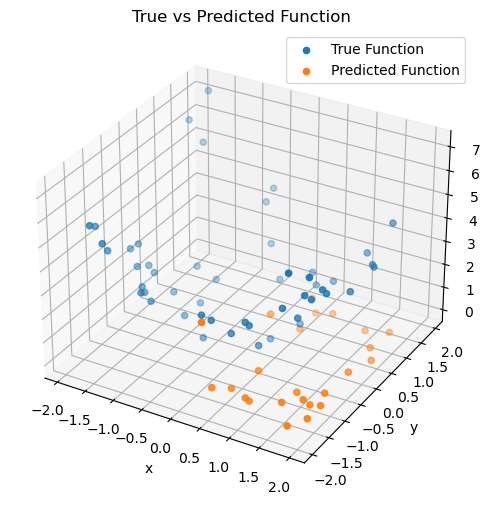

Predicted Function Expression Tree:


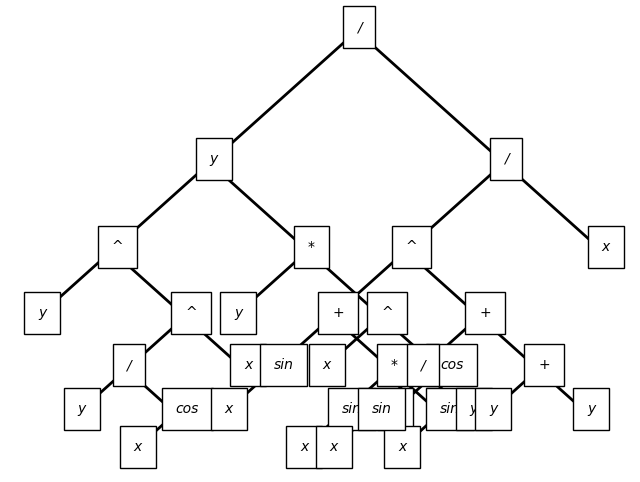

In [7]:
# Step 1: Generate training data from a known function
def true_function(x):
    return x[0]**2 + x[1]**2  # 2-dimensional function: f(x, y) = x^2 + y^2

# Generate training data
training_set_size = 100
x_train = np.random.uniform(-2, 2, (training_set_size, 2))  # 2D points in the range [-2, 2]
y_train = true_function(x_train.T)  # Transpose x_train to get the x and y values

training_set = list(zip(x_train, y_train))

# Step 2: Train the genetic algorithm
genetic_algorithm = GeneticAlgorithm(population_size=20, max_depth=5, training_set=training_set)
population = genetic_algorithm.generate_initial_population()

# Evolutionary loop
generations = 0
while not genetic_algorithm.termination_condition(generations):
    population = genetic_algorithm.evolutionary_loop(population)
    print(f"Generation {generations+1}, Best Fitness: {genetic_algorithm.evaluate_fitness(min(population, key=genetic_algorithm.evaluate_fitness))}")
    generations += 1

# Step 3: Validation
validation_set_size = 50
x_val = np.random.uniform(-2, 2, (validation_set_size, 2))  # Random 2D points for validation
y_val_true = true_function(x_val.T)  # Transpose x_val to get the x and y values

# Predict using the best individual from the last generation
best_individual = min(population, key=genetic_algorithm.evaluate_fitness)
y_val_pred = [best_individual.root.evaluate(x) for x in x_val]

# Step 4: Measure MSE
mse = np.mean((y_val_true - y_val_pred) ** 2)
print(f"Validation MSE: {mse}")

# Step 5: Visualization
# Since it's a 2D function, visualization can be done in a scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_val[:, 0], x_val[:, 1], y_val_true, label='True Function')
ax.scatter(x_val[:, 0], x_val[:, 1], y_val_pred, label='Predicted Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('True vs Predicted Function')
plt.legend()
plt.show()

print('Predicted Function Expression Tree:')
best_individual.display()


# Training the Genetic Algorithm for Functions with Different Domains

This section demonstrates the training of the genetic algorithm for functions with different domains, where the function output varies based on the input value.
## Steps

### Step 1: Define a Custom True Function with Different Domains

A custom true function is defined with different domains. In this example, if the input value \( x \) is less than 5, the function returns \( x \); otherwise, it returns \( 2x \).

### Step 2: Generate Training Data

Training data is generated by sampling input values from the defined domain and computing the corresponding output values using the true function.

### Step 3: Train the Genetic Algorithm

The genetic algorithm is trained with the generated training data to approximate the true function. This involves initializing the algorithm with parameters such as population size, maximum depth of expression trees, and the training set, followed by generating the initial population of expression trees.

### Evolutionary Loop

The evolutionary loop iteratively evolves the population of expression trees through selection, crossover, and mutation until a termination condition is met.

### Step 4: Validation

A validation set is generated to evaluate the performance of the best individual expression tree found during the evolutionary process. The true function values are compared with the predicted function values.

### Step 5: Measure Mean Squared Error (MSE)

The mean squared error (MSE) between the true function values and the predicted function values is calculated to quantify the accuracy of the predictions.

### Step 6: Visualization

The true function values and the predicted function values are plotted against the input variable \( x \). Additionally, the expression tree representing the predicted function is displayed for further analysis.



## Examples

Generation 1, Best Fitness: 149.84001776887484
Generation 2, Best Fitness: 149.84001776887484
Generation 3, Best Fitness: 149.84001776887484
Generation 4, Best Fitness: 149.84001776887484


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_8404\809343015.py:28: RuntimeWarning: invalid value encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)


Generation 5, Best Fitness: 149.84001776887484
Generation 6, Best Fitness: nan
Generation 7, Best Fitness: 149.84001776887484
Generation 8, Best Fitness: 149.84001776887484
Generation 9, Best Fitness: 149.84001776887484
Generation 10, Best Fitness: 149.84001776887484
Generation 11, Best Fitness: 149.84001776887484
Generation 12, Best Fitness: 149.84001776887484
Generation 13, Best Fitness: 149.84001776887484
Generation 14, Best Fitness: 149.84001776887484
Generation 15, Best Fitness: 149.84001776887484
Validation MSE: 3.5281694960054724


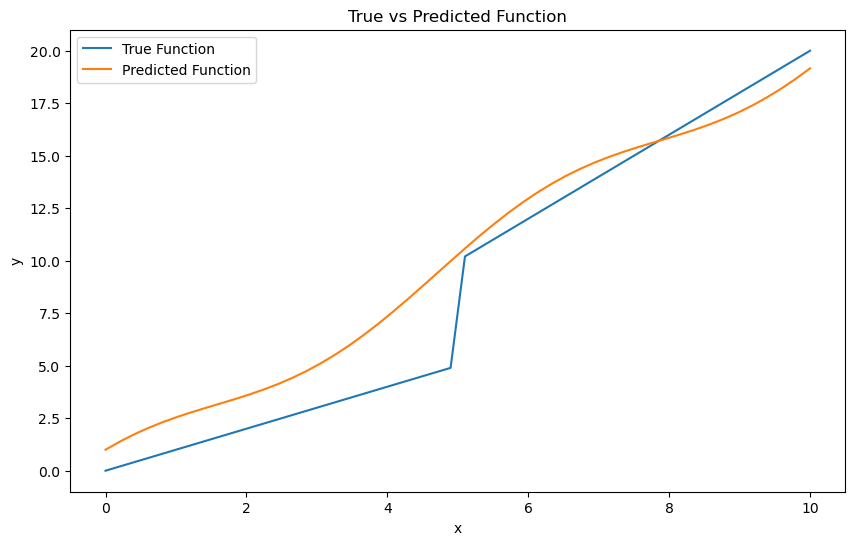

Predicted Function ExpressionTree:


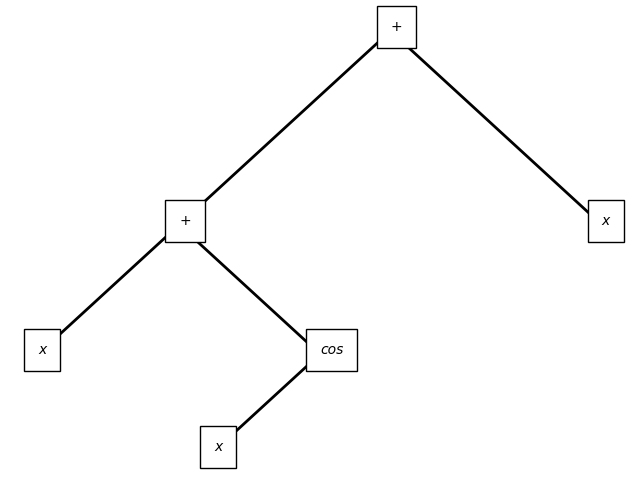

In [8]:


# Step 1: Define a custom true function with different domains
def true_function(x):
    if x < 5:
        return x
    else:
        return 2*x

# Generate training data
training_set_size = 100
x_train = np.linspace(0, 10, training_set_size)
y_train = np.array([true_function(x) for x in x_train])

training_set = list(zip(x_train, y_train))

# Step 2: Train the genetic algorithm
genetic_algorithm = GeneticAlgorithm(population_size=10, max_depth=5, training_set=training_set)
population = genetic_algorithm.generate_initial_population()

# Evolutionary loop
generations = 0
while not genetic_algorithm.termination_condition(generations):
    population = genetic_algorithm.evolutionary_loop(population)
    print(f"Generation {generations+1}, Best Fitness: {genetic_algorithm.evaluate_fitness(min(population, key=genetic_algorithm.evaluate_fitness))}")
    generations += 1

# Step 3: Validation
validation_set_size = 50
x_val = np.linspace(0, 10, validation_set_size)
y_val_true = np.array([true_function(x) for x in x_val])

# Predict using the best individual from the last generation
best_individual = min(population, key=genetic_algorithm.evaluate_fitness)
y_val_pred = [best_individual.root.evaluate(x) for x in x_val]

# Step 4: Measure MSE
mse = np.mean((y_val_true - y_val_pred) ** 2)
print(f"Validation MSE: {mse}")

# Step 5: Visualization
plt.figure(figsize=(10, 6))
plt.plot(x_val, y_val_true, label='True Function')
plt.plot(x_val, y_val_pred, label='Predicted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Function')
plt.legend()
plt.show()

print('Predicted Function ExpressionTree:')
best_individual.display()


# Summary and Conclusion

In this project, we explored the application of genetic algorithms for function approximation. We developed a modular and flexible system capable of handling both one-dimensional and multi-dimensional functions. Here's a recap of the key components and findings:

## Key Components:
1. **Expression Tree Representation:** We implemented an expression tree structure to represent mathematical expressions, allowing for the construction and evaluation of complex functions.
2. **Genetic Algorithm:** A genetic algorithm was developed to evolve populations of expression trees, optimizing them to approximate target functions based on training data.
3. **Training Process:** The training process involved generating random expression trees, evaluating their fitness using a provided training set, and iteratively evolving the population through selection, crossover, and mutation.
4. **Validation and Evaluation:** We validated the trained models using a separate validation set, calculating the mean squared error (MSE) to quantify prediction accuracy.
5. **Visualization:** Visualizations were provided to compare the true function with the predicted function, aiding in the interpretation and analysis of results.

## Findings:
1. **Function Approximation:** The genetic algorithm successfully approximated both one-dimensional and multi-dimensional functions, demonstrating its effectiveness in capturing complex relationships.
2. **Accuracy:** The accuracy of the predictions, as measured by the MSE, varied depending on factors such as population size, maximum depth of expression trees, and the complexity of the target function.
3. **Flexibility:** The system exhibited flexibility in handling functions with different domains and dimensions, showcasing its versatility in various applications.
4. **Interpretability:** The expression tree representation provided insight into the structure of the learned functions, enabling interpretability and understanding of the underlying relationships.

## Conclusion:
Genetic algorithms offer a powerful approach to function approximation, particularly in scenarios where the underlying relationships are complex or poorly understood. By evolving populations of expression trees, these algorithms can adaptively learn and optimize models to approximate target functions accurately. The modular and flexible nature of our system allows for easy customization and extension to tackle a wide range of problems in mathematics, engineering, and other fields.
